In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [8]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 94% 254M/271M [00:02<00:00, 122MB/s]
100% 271M/271M [00:02<00:00, 120MB/s]
 99% 537M/544M [00:09<00:00, 82.0MB/s]
100% 544M/544M [00:09<00:00, 60.7MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 113MB/s]


# Importing Libraries

In [1]:
import os, cv2 # to import directory of file
import zipfile
import pandas as pd #libraries to read
import numpy as np #for algebric function
import matplotlib.pyplot as plt # for visualization
import matplotlib.image as imgplt #for image visualization
import seaborn as sns #Seaborn for visualization

# Sklearn Libraries
from sklearn.model_selection import train_test_split #for test & train Split
from sklearn.metrics import confusion_matrix, accuracy_score # metrics
from sklearn.preprocessing import StandardScaler #for scaling to increase computing speed

#keras libraries
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv3D, Flatten, MaxPool2D, Dropout, Activation, AvgPool2D
from keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam

Using TensorFlow backend.


# Reading files

In [2]:
sam_sub = pd.read_csv("/content/sample_submission.csv")
sam_sub[:2]

,id,label
0,1,0.5
1,2,0.5


## Reading file in Zip File

In [3]:
with zipfile.ZipFile("/content/test.zip") as z:
    z.extractall(".")

with zipfile.ZipFile("/content/train.zip") as z:
    z.extractall(".")

print(os.listdir('.'))

['.config', 'test', 'sample_submission.csv', 'drive', 'train', 'test.zip', 'train.zip', 'sample_data']


In [4]:
train_dir = ["./train/"+i for i in os.listdir("./train")]
dog_dir = ["./train/"+i for i in os.listdir("./train") if 'dog' in i]
cat_dir = ["./train/"+i for i in os.listdir("./train") if 'cat' in i]
test_dir = ["./test/"+i for i in os.listdir("./test")]
print(train_dir[:4])
print(dog_dir[:2])
print(cat_dir[:2])

['./train/dog.2382.jpg', './train/dog.2111.jpg', './train/cat.2300.jpg', './train/cat.10246.jpg']
['./train/dog.2382.jpg', './train/dog.2111.jpg']
['./train/cat.2300.jpg', './train/cat.10246.jpg']


### Sample Image

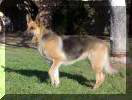

In [5]:
load_img(dog_dir[7])

# Converting img into Arrays
## Reading files in Directory

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (175, 175), interpolation=cv2.INTER_CUBIC)

In [7]:
train = np.array([read_image(i) for i in train_dir])
test = np.array([read_image(i) for i in test_dir])
print("Train :",train.shape)
print("Test  :",test.shape)

Train : (25000, 175, 175, 3)
Test  : (12500, 175, 175, 3)


## Assing 1 & 0 to Lable for Dog & Cat Resp. as mentioned in kaggle

In [0]:
lable = []
for i in os.listdir("./train"):
  if 'dog' in i:
     lable.append(1)
  else:
      lable.append(0)
lable = np.array(lable)

## Visualization

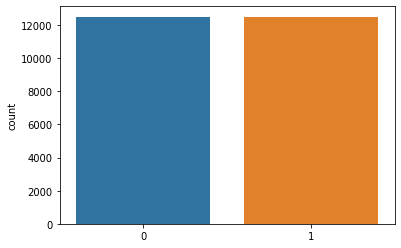

In [9]:
sns.countplot(lable)
#data is equally distributed

Text(0.5, 1.0, '0')

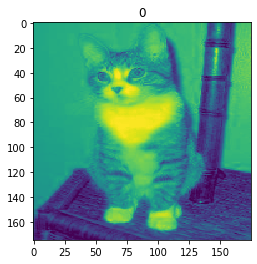

In [10]:
plt.imshow(train[7][:,:,0])
plt.title(lable[7])
#lable 0 --> Cat
#lable 1 --> Dog

# Train Test Split

In [11]:
x=train
y=lable
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16750, 175, 175, 3)
(8250, 175, 175, 3)
(16750,)
(8250,)


# CNN Model

## Model 1

def catvsdog(opt):
  model = Sequential()
  #adding layers in models
  model.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',padding="same",input_shape=(128,128,3),activation="relu"))
  model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(filters=64,kernel_size=(4,4),padding="same",activation="relu",kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  #model.add(Dropout(0.5))

  #model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer='he_uniform'))
  #model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer='he_uniform'))
  #model.add(MaxPool2D(2,2))

  model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer='he_uniform'))
  model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu",kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())

  model.add(Dense(256,activation="relu"))
  #model.add(Dropout(.5))

  model.add(Dense(256,activation="relu"))
  #model.add(Dropout(.5))

  model.add(Dense(1,activation="softmax"))

  model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

  return model

## Model 2

def catvsdog2():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), input_shape=(128,128,3)))
  model.add(Activation("relu"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(16))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation("sigmoid"))

  model.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])
  return model

## Model - 3

In [0]:
def catvsdog3():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), input_shape=(175,175,3)))
  model.add(Activation("relu"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(101, (3, 3)))
  model.add(Activation("relu"))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(AvgPool2D(pool_size=(2, 2)))


  model.add(Conv2D(32, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(24))
  model.add(Activation("relu"))
  model.add(Dropout(0.25))
  model.add(Dense(15))
  model.add(Activation("relu"))
  model.add(Dropout(0.1))
  model.add(Dense(1))
  model.add(Activation("sigmoid"))

  model.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])
  return model

In [13]:
#model1 = catvsdog(Adam())
#model2 = catvsdog2()
model3 = catvsdog3()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Learning Rate optimize

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=4, min_lr=0.0001)

# Data Argumentation

In [0]:
datagen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.2,
    rescale=1.0/255.0,
    rotation_range = 20,
    horizontal_flip=True,
    vertical_flip=True,)
datagen.fit(x_train)

# Fitting Model

In [16]:
mod = model3.fit(datagen.flow(x_train,y_train,batch_size=30),validation_data=(x_train,y_train),epochs=50,callbacks=[reduce_lr])




Epoch 1/50





559/559 [==============================] - 124s 221ms/step - loss: 0.6746 - acc: 0.5807 - val_loss: 6.0980 - val_acc: 0.5926
Epoch 2/50
559/559 [==============================] - 110s 197ms/step - loss: 0.6227 - acc: 0.6585 - val_loss: 6.4434 - val_acc: 0.5774
Epoch 3/50
559/559 [==============================] - 109s 195ms/step - loss: 0.5998 - acc: 0.6832 - val_loss: 7.1611 - val_acc: 0.5434
Epoch 4/50
559/559 [==============================] - 109s 194ms/step - loss: 0.5734 - acc: 0.7098 - val_loss: 6.0533 - val_acc: 0.5866
Epoch 5/50
559/559 [==============================] - 109s 195ms/step - loss: 0.5568 - acc: 0.7241 - val_loss: 4.9445 - val_acc: 0.6717
Epoch 6/50
559/559 [==============================] - 108s 193ms/step - loss: 0.5266 - acc: 0.7410 - val_loss: 5.5526 - val_acc: 0.6324
Epoch 7/50
559/559 [==============================] - 108s 194ms/step - loss: 0.5118 - acc: 0.7583 - val_loss: 4.4997 - val_acc: 0.7088
Epoch 8/50
559/559 [====================

# Evaluation

In [21]:
print(mod.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


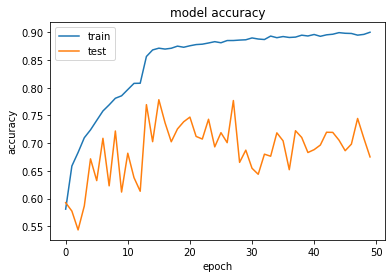

In [23]:
# summarize history for accuracy
plt.plot(mod.history['acc'])
plt.plot(mod.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


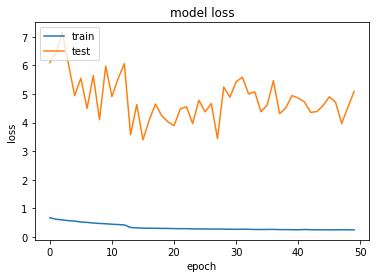

In [24]:
# summarize mod for loss
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
y_pred = model3.predict(x_test)
y_pred[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [34]:
print(accuracy_score(y_pred.round(),y_test))
confusion_matrix(y_pred.round(),y_test)

0.6678787878787878


array([[1454,   89],
       [2651, 4056]])

In [0]:
preds = model3.predict(test)

In [0]:
rst = pd.DataFrame(preds.astype(int),columns=["label"])
rst["id"] = pd.Series(range(1,(len(preds)+1)))
sub = rst[["id","label"]]
#p = np.array(preds)
sub.to_csv("submission.csv",index=False)

In [53]:
sub[:3]

,id,label
0,1,1
1,2,0
2,3,0


In [43]:
sam_sub[:3]

,id,label
0,1,0.5
1,2,0.5
2,3,0.5


In [47]:
preds.astype(int)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [50]:
len(preds)

12500

In [51]:
sub.shape

(12500, 2)